In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Esse notebook tem o objetivo de implementar o TSMOM do  Moskowitz.

![Equação do TSMOM](images/tsmom_eq.jpeg)

Em resumo a equação final do TSMOM do Moskowitz tem 3 partes: 
- O cálculo do momento do ativo
- Poderação do peso no portifolio 
- Rendimento da estratégia

Cálculo do Momento: Calcula-se o retorno do periodo desejado (no caso da imagem os ultimos 12 meses), e com o retorno e mãos retira-se o sinal, tomando assim uma posição de vendido ou comprado.

O peso no portifolio: Risco buscado no investimento (no caso da imagem 20%), dividido pelo desvio padrão exponencial.



In [2]:
df = pd.read_csv("data.csv")
df.index = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.drop('date', axis=1)

close_columns = []
high_columns = []
low_columns = []
open_columns = []
volume_columns = []
open_int_columns = []

for i in df.columns:
    if "close" in i:
        close_columns.append(i)
    elif "high" in i:
        high_columns.append(i)
    elif "low" in i:
        low_columns.append(i)
    elif "open_int" in i:
        open_int_columns.append(i)
    elif "open" in i:
        open_columns.append(i)
    elif "volume" in i:
        volume_columns.append(i)
        
close_df = df[close_columns]
high_df = df[high_columns]
low_df = df[low_columns]
open_df = df[open_columns]
volume_df = df[volume_columns]
open_int_df = df[open_int_columns]

In [3]:
close_df.tail()

,AN_close,BN_close,CC_close,CN_close,CT_close,DA_close,DX_close,EC_close,EN_close,ES_close,...,ZU_close,ZW_close,ZZ_close,DT_close,HS_close,LX_close,NK_close,SP_close,UB_close,AX_close
date,,,,,,,,,,,,,,,,,,,,,
2019-06-17,68.69,125.91,2479.0,74.680,66.42,16.84,97.050,97.900,7561.25,2896.25,...,52.17,539.50,83.050,171.58,26975.0,7292.5,21095.0,2896.3,134.11,12082.0
2019-06-18,68.92,126.11,2500.0,74.865,66.82,16.86,97.155,97.900,7673.50,2926.25,...,54.11,531.50,81.475,172.76,27269.0,7386.0,21210.0,2926.2,134.61,12321.5
2019-06-19,69.08,127.19,2513.0,75.375,67.16,16.98,96.580,97.995,7702.00,2933.50,...,53.97,522.25,81.625,172.53,27968.0,7331.5,21310.0,2933.4,134.45,12298.0
2019-06-20,69.40,127.48,2446.0,75.925,65.96,17.18,96.140,98.045,7772.75,2960.00,...,57.07,526.50,79.250,172.59,28338.0,7363.5,21460.0,2960.0,134.43,12361.5
2019-06-21,69.44,127.85,2502.0,75.830,65.56,17.09,95.720,98.015,7751.50,2950.50,...,57.43,526.00,76.250,172.08,28255.0,7318.0,21190.0,2950.6,134.26,12270.0


## Signals

In [4]:
# daily data
returns_daily = close_df.pct_change().dropna()
vol_daily = returns_daily.ewm(adjust=True, com=60, min_periods=0).std().dropna()

#monthly data
returns_monthly = close_df.pct_change(20).dropna().resample('BM').last().ffill()
vol_monthly = (np.sqrt(261)*vol_daily).resample('BM').last().ffill()

In [5]:
vol_monthly.head()

,AN_close,BN_close,CC_close,CN_close,CT_close,DA_close,DX_close,EC_close,EN_close,ES_close,...,ZU_close,ZW_close,ZZ_close,DT_close,HS_close,LX_close,NK_close,SP_close,UB_close,AX_close
date,,,,,,,,,,,,,,,,,,,,,
1999-06-30,0.105042,0.062671,0.340395,0.079590,0.208741,0.117408,0.057450,0.006805,0.273889,0.171174,...,0.376478,0.145714,0.381138,0.073597,0.217934,0.083019,0.097903,0.171116,0.032165,0.126013
1999-07-30,0.102485,0.092296,0.367361,0.053053,0.248199,0.228037,0.072208,0.004424,0.272543,0.151698,...,0.301792,0.282767,0.413881,0.073126,0.311318,0.224145,0.188760,0.151480,0.041537,0.218992
1999-08-31,0.100980,0.087018,0.317635,0.065784,0.233056,0.262282,0.082101,0.005188,0.283183,0.173361,...,0.290636,0.255201,0.383358,0.071736,0.313992,0.221060,0.191588,0.173167,0.040713,0.222227
1999-09-30,0.098992,0.082781,0.351501,0.061236,0.229098,0.270938,0.080132,0.005897,0.294703,0.186051,...,0.270916,0.260535,0.352725,0.075146,0.293303,0.209225,0.184466,0.186178,0.043353,0.216286
1999-10-29,0.101794,0.082981,0.329411,0.055821,0.218192,0.297339,0.086932,0.006833,0.308855,0.217140,...,0.377323,0.247127,0.351677,0.075506,0.329189,0.212675,0.189809,0.217070,0.043262,0.213240


### Parkinson's Volatility
estimating vol with high and low prices
![Número de Parkinson](images/parkinson_vol.png)

In [6]:
def parkinson_vol(high_df, low_df, period=60):
    x = np.log(np.divide(high_df, low_df)) ** 2
    x.columns = [x[0:3] + "pv" for x in x.columns]
    
    pv = x.copy()

    
    const = 1 / (4 * period * np.log(2))
    
    pv.iloc[:period,:] = np.nan
        
    for row in range(period, len(high_df)):
        pv.iloc[row] = np.sqrt(const * np.sum(x.iloc[row-period:row,:]))
        
    return pv

## Garman and Klass volatility
estimating vol with close, open, low and prices.

![Garman Klass vol](images/garman-klass_vol.png)

In [7]:
def garman_klass_vol(high_df, low_df, close_df, open_df, period=60):
    
    x_oc = np.log(np.divide(open_df, close_df.shift(-1))) ** 2
    x_hl = (1/2)*(np.log(np.divide(high_df, low_df))) ** 2
    x_co = - (2 * np.log(2) - 1)* (np.log(np.divide(close_df, open_df))**2)
    
    x = x_hl + x_co.values
    
    x.columns = [x[0:3] + "gk" for x in x.columns]
    
    gk = x.copy()
    
    const = 1/period
    
    gk.iloc[:period,:] = np.nan
    
    for row in range(period, len(high_df)):
        gk.iloc[row] = np.sqrt(const * np.sum(x.iloc[row-period:row,:]))
        
    return gk

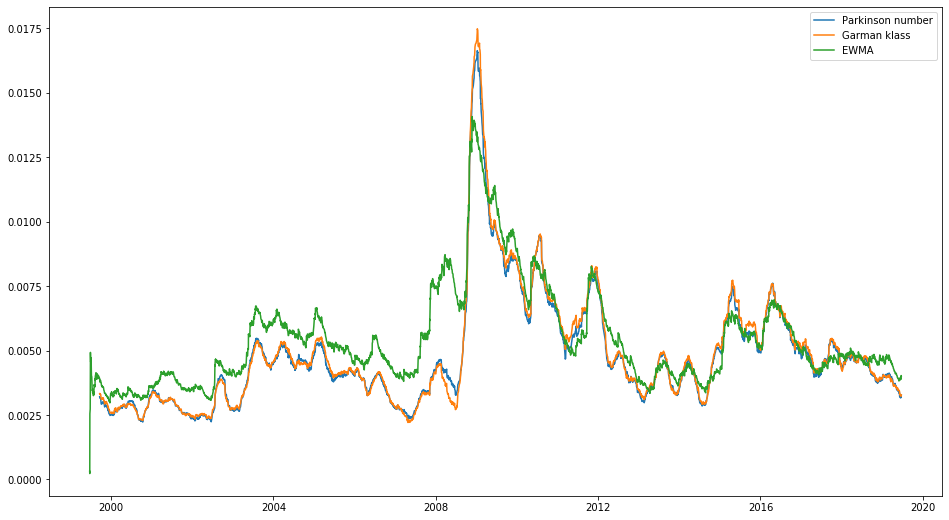

In [8]:
pv_df = parkinson_vol(high_df, low_df)
gk_df = garman_klass_vol(high_df, low_df, close_df, open_df)

plt.figure(figsize=(16,9))

plt.plot(pv_df.iloc[:,3], label= "Parkinson number")
plt.plot(gk_df.iloc[:,3], label="Garman klass")
plt.plot(vol_daily.iloc[:,3], label="EWMA")

plt.legend()

plt.show()

In [9]:
pv_monthly = (np.sqrt(261)*pv_df).resample('BM').last().ffill()
gk_monthly = (np.sqrt(261)*gk_df).resample('BM').last().ffill()

## Machine Learning Forecast

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree         import DecisionTreeRegressor
from sklearn.ensemble     import RandomForestRegressor

from statsmodels.tsa.arima_model import ARIMA

import xgboost as xgb

In [83]:
def ml_signal(model, returns, lags=range(3,12)):
    """
    Return predict and signal construction (long or short)
    """
    signal = []
    
    for i in returns.columns:
        # converting Series to DataFrame to do the feature engineering
        stock = pd.DataFrame(returns[i].copy())
        
        # renaming target variable
        stock.columns = ["y"]
        
        # adding lagged columns
        for i in lags:
            stock["lag_{}".format(i)] = stock.y.shift(i)
            
        y = stock[:-1].dropna().y                   # target
        X = stock[:-1].dropna().drop(['y'], axis=1) # features
        
        model.fit(X, y)
        
        X_pred = []
        for i in lags:
            X_pred.append(stock["lag_" + str(i)][-i])
        
        y_pred = model.predict([X_pred])
        
        sign = np.where(y_pred/stock.iloc[-1] - 1 > 0, -1, 1)
        
        signal.append(sign[0])
        
    return signal

def ml_signal_momentum(model, prices, lags=[3,6,12]):
    """
    Return predict and signal construction (long or short)
    """
    signal = []
    
    for i in prices.columns:
        # converting Series to DataFrame to do the feature engineering
        stock = pd.DataFrame(prices[i].copy())
        
        # renaming target variable
        stock.columns = ["y"]
        
        # adding lagged columns
        for i in lags:
            stock["lag_{}".format(i)] = stock.y.pct_change(i)
            
        y = stock[:-1].dropna().y                   # target
        X = stock[:-1].dropna().drop(['y'], axis=1) # features
        
        model.fit(X, y)
        
        X_pred = []
        for i in lags:
            X_pred.append(stock["lag_" + str(i)][-i])
        
        y_pred = model.predict([X_pred])
        
        sign = np.where(y_pred/stock.iloc[-1] - 1 > 0, -1, 1)
        
        signal.append(sign[0])
        
    return signal

In [ ]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rf = RandomForestRegressor()

price_monthly = close_df.resample('BM').last().ffill()


a=30
b=80
signal = ml_signal(rf, price_monthly[a:b])

In [ ]:
def absolute_percentage_error(y_true, y_pred): 
    return np.abs((y_true - y_pred) / y_true)* 100

lr = LinearRegression()
dtr = DecisionTreeRegressor()
rf = RandomForestRegressor()

price_monthly = close_df.resample('BM').last().ffill()


signals = []

for i in range(40, 100):
    a = i-30
    b=i
    signal = ml_signal(rf, price_monthly[a:b])

    date = b

    true = np.array(price_monthly.iloc[date].copy())
    past_value = np.array(price_monthly.iloc[date-1].copy())
    pred = pd.DataFrame(np.array(signal))

    result = pd.DataFrame()
    result["Past"] = past_value
    result["True"] = true
    result["Pred"] = pred
    result["Mean Abs Error"] = absolute_percentage_error(result["True"], result["Pred"])
    result["True sign"] = np.where(result["True"]/result["Past"]-1 > 0,1,-1)
    result["ML Pred sign"] = np.where(result["Pred"]/result["Past"]-1 > 0,1,-1)
    result["Mom Pred sign"] = np.where(price_monthly[a:b].pct_change(21*12).iloc[-1] > 0, 1, -1)
    result["ML Score"] = result["ML Pred sign"] == result["True sign"]
    result["Mom Score"] = result["Mom Pred sign"] == result["True sign"]

    signals.append([result["ML Score"].sum()/54, result["Mom Score"].sum()/54])

In [ ]:
r = pd.DataFrame(signals)
r.columns = ["ML", "Mom"]
print(r["ML"].mean(), r["Mom"].mean())

## Algorithm

![Generalização do TSMOM](images/ts_eq.png)

Onde $X_t$ é o sinal de predição, que esta entre -1 e 1

In [80]:
def signal(df, date, passive, method):
        
    num_assets = len(df.iloc[-1])
    signal = []
    
    if passive:
        signal = np.ones(num_assets)
    else:
    
        if method == "momentum":

            returns = df.pct_change(21 * 12).resample('BM').last().ffill()[:date]

            signal = np.where(returns.iloc[-1] > 0, 1, -1)

        elif method == "momentum_lagged":

            returns_12 = df.pct_change(21 * 12).resample('BM').last().ffill()[:date]

            returns_6 = df.pct_change(21 * 6).resample('BM').last().ffill()[:date]

            returns_3 = df.pct_change(21 * 3).resample('BM').last().ffill()[:date]

            momentum_mean = (returns_12.iloc[-1] + returns_6.iloc[-1] + returns_3.iloc[-1]) / 3

            signal = np.where(momentum_mean > 0, 1, -1)

        elif method == "linear_regression":
            prices = df.resample('BM').last().ffill()[:date]

            lr = LinearRegression()

            signal = ml_signal(lr, prices)

        elif method == "decision_tree":
            returns = df.pct_change(20).resample('BM').last().ffill()[:date]

            vol_daily = returns_daily.ewm(adjust=True, com=60, min_periods=0).std().dropna()

            vol_monthly = (np.sqrt(261)*vol_daily).resample('BM').last().ffill()[:date]

            dtr = DecisionTreeRegressor()

            signal = ml_signal(dtr, returns)

        elif method == "random_forest":
            returns = df.pct_change(20).resample('BM').last().ffill()[:date]

            vol_daily = returns_daily.ewm(adjust=True, com=60, min_periods=0).std().dropna()

            vol_monthly = (np.sqrt(261)*vol_daily).resample('BM').last().ffill()[:date]

            rf = RandomForestRegressor()

            signal = ml_signal(rf, np.divide(returns, vol_monthly))
            
        elif method == "mom_linear_regression":
            
            prices = df[:date]
            
            lr = LinearRegression()
            
            signal = ml_signal_momentum(lr, prices)
                
    return signal
    
def tsmom (df,returns_monthly, vol_monthly,date, method = 'momentum', risk=0.4, passive=False, momentum_window=12):
    
    position = signal(df, date, passive, method)
        
    weights = (risk / vol_monthly.iloc[date-1])
    
    weights /= len(weights)
    
    portfolio = position * weights
    
    return (1+np.dot(portfolio, returns_monthly.iloc[date]))

# Backtesting and plot functions

In [66]:
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print('\r%s |%s| %s%% %s' % (prefix, bar, percent, suffix), end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

def plot_backtesting(returns_model, returns_baseline, years, label_model, label_baseline, title):

    plt.figure(figsize=(16, 9))

    plt.plot(100*returns_model.cumprod(), label=label_model, color='blue')
    plt.plot(100*returns_baseline.cumprod(),
             label=label_baseline, color='red')

    plt.yscale('log')
    plt.legend()
    plt.title(title)
    plt.show()
    
    passive_return = float((returns_baseline.cumprod().iloc[-1] - 1)*100)
    tsmom_return = float((returns_model.cumprod().iloc[-1] - 1)*100)

    print('Passive ', label_baseline, ' return: ', round(passive_return,2), '%,',
         " Annualized: ", round((((100+passive_return)/100) ** (1/years) - 1)*100 , 2), "%", sep='')

    print('TSMOM ', label_model, ' return: ', round(tsmom_return,2), "%,",
         " Annualized: ", round((((100+tsmom_return)/100) ** (1/years) - 1)*100 , 2), "%", sep='')
    
def backtesting(close_df, vol_monthly, start_date, years, method, plot=True):

    returns_model = []  
    returns_baseline = []
    start = start_date
    years = years
    end = 12*(int(start/12) + years)

    for i in range(start, end):
        
        printProgressBar (iteration=i-start, total=end-start-1)

        returns_model.append(tsmom(close_df, returns_monthly, vol_monthly, i, method))

        returns_baseline.append(tsmom(close_df, returns_monthly, vol_monthly, i, passive=True))

    returns_model = pd.DataFrame(returns_model)
    returns_baseline = pd.DataFrame(returns_baseline)

    returns_model.index = returns_monthly.iloc[start:end].index
    returns_baseline.index = returns_monthly.iloc[start:end].index

    if plot:
        plot_backtesting(returns_model, returns_baseline, years, method, "Long only", "Cumulative returns")

## Classic TSMOM

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


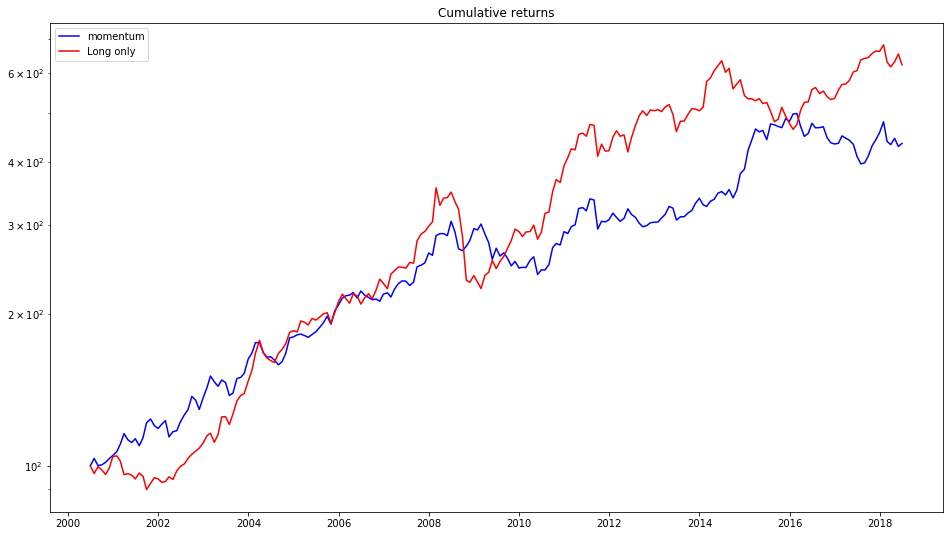

Passive Long only return: 522.68%, Annualized: 10.1%
TSMOM momentum return: 335.15%, Annualized: 8.05%


In [67]:
backtesting(close_df, vol_monthly, start_date= 11, years=19, method="momentum", plot=True)

## Parkinson vol

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


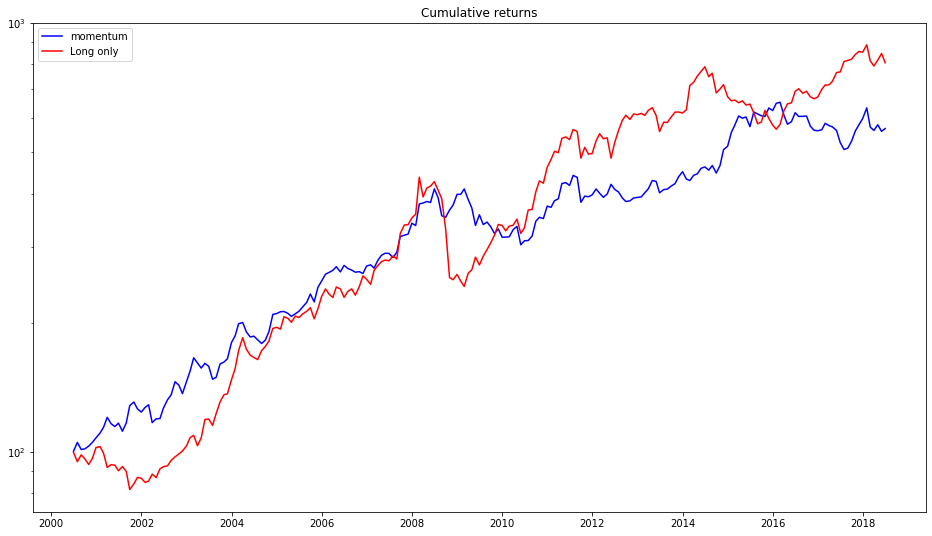

Passive Long only return: 706.96%, Annualized: 11.62%
TSMOM momentum return: 467.0%, Annualized: 9.56%


In [68]:
backtesting(close_df, pv_monthly, start_date= 11, years=19, method="momentum", plot=True)

## Garman klass vol

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


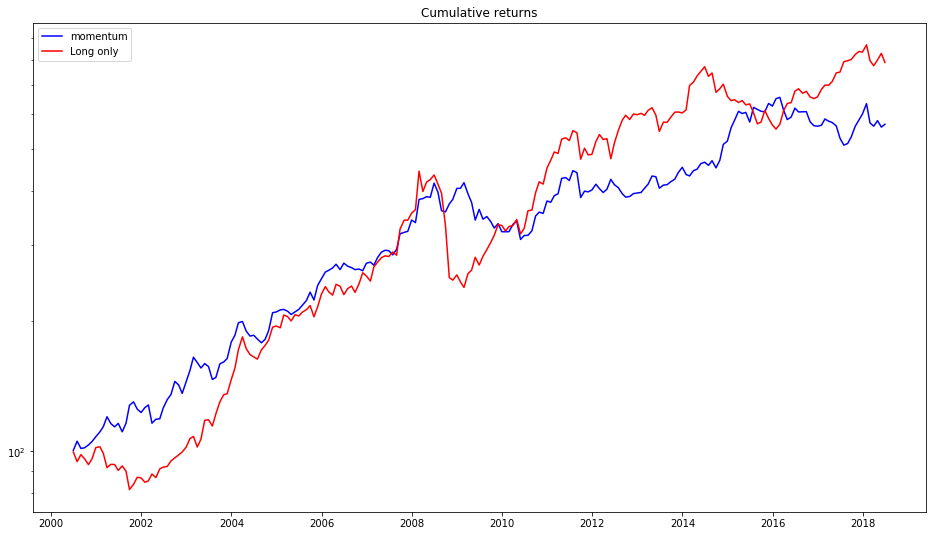

Passive Long only return: 690.74%, Annualized: 11.5%
TSMOM momentum return: 469.31%, Annualized: 9.59%


In [69]:
backtesting(close_df, gk_monthly, start_date= 11, years=19, method="momentum", plot=True)

# Multiple mometums as signals

## Classic mometum vol

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


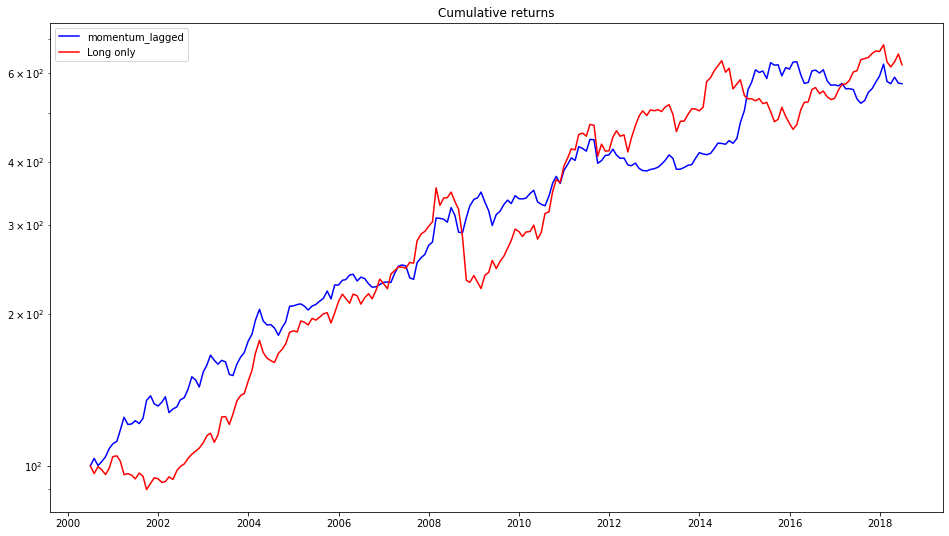

Passive Long only return: 522.68%, Annualized: 10.1%
TSMOM momentum_lagged return: 471.4%, Annualized: 9.61%


In [70]:
backtesting(close_df, vol_monthly, start_date= 11, years=19, method="momentum_lagged", plot=True)

## Parkinson number

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


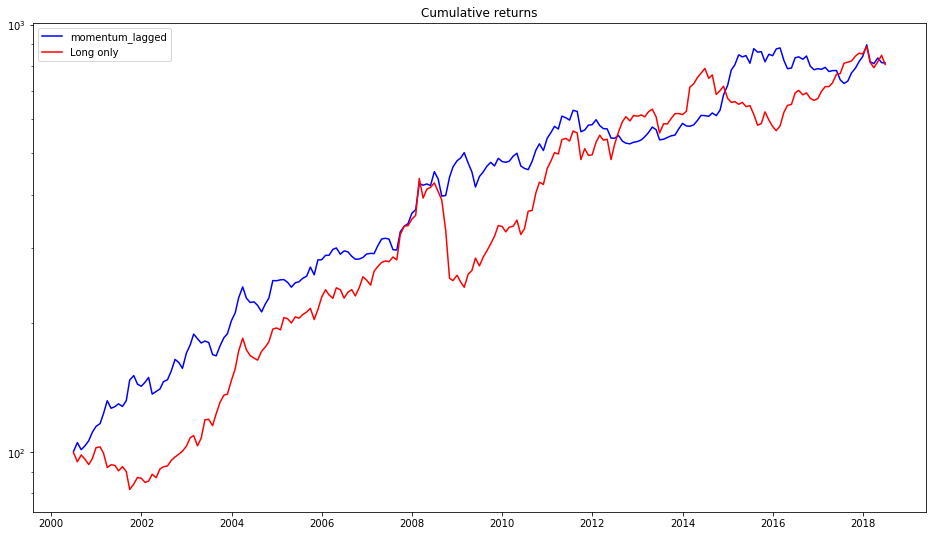

Passive Long only return: 706.96%, Annualized: 11.62%
TSMOM momentum_lagged return: 713.17%, Annualized: 11.66%


In [71]:
backtesting(close_df, pv_monthly, start_date= 11, years=19, method="momentum_lagged", plot=True)

## Garman Klass

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


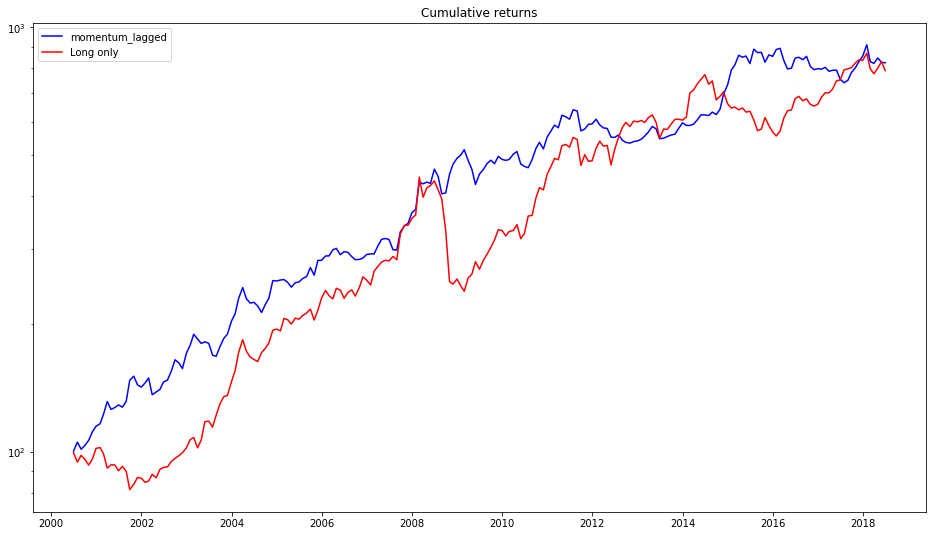

Passive Long only return: 690.74%, Annualized: 11.5%
TSMOM momentum_lagged return: 725.16%, Annualized: 11.75%


In [72]:
backtesting(close_df, gk_monthly, start_date= 11, years=19, method="momentum_lagged", plot=True)

# Machine Learning

## Linear Regression

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


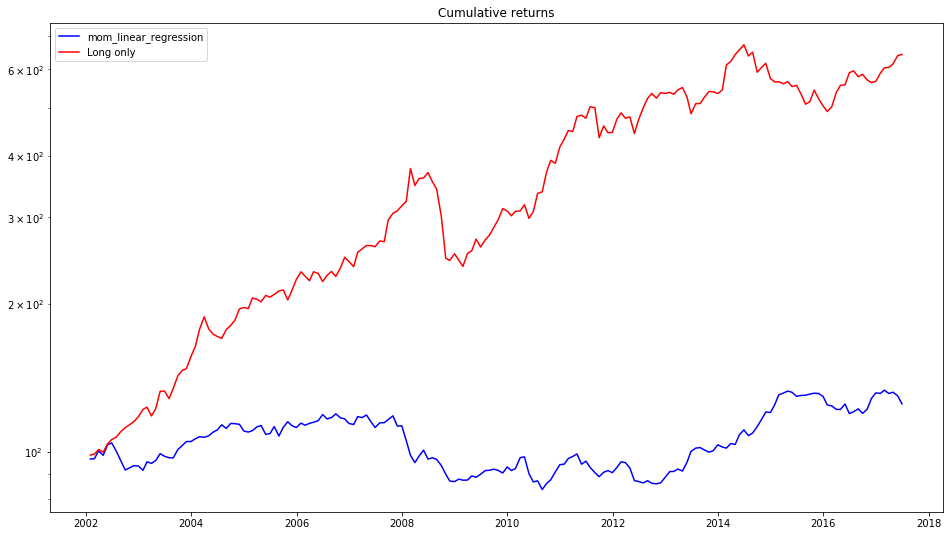

Passive Long only return: 543.29%, Annualized: 12.34%
TSMOM mom_linear_regression return: 25.05%, Annualized: 1.41%


In [85]:
backtesting(close_df, vol_monthly, start_date= 30, years=16, method="mom_linear_regression", plot=True)

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


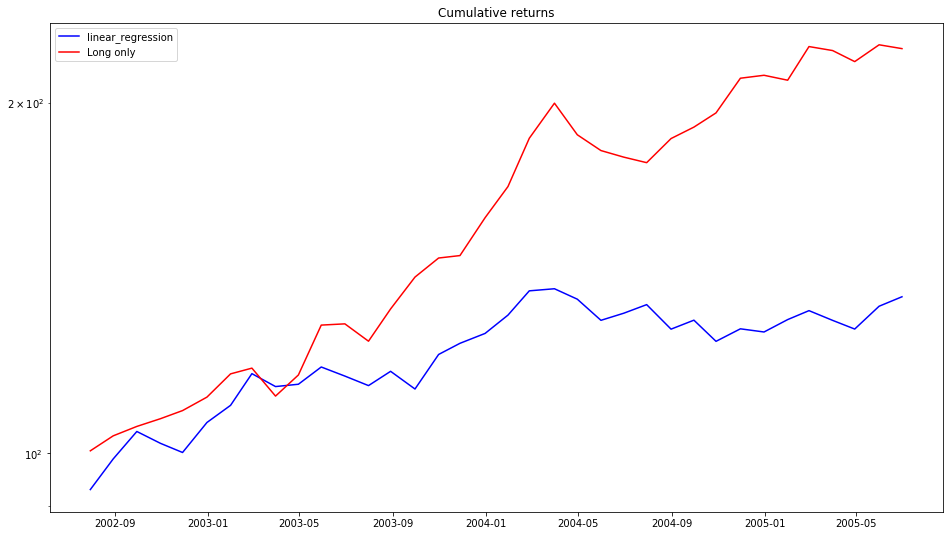

Passive Long only return: 122.67%, Annualized: 30.58%
TSMOM linear_regression return: 36.24%, Annualized: 10.86%


In [74]:
backtesting(close_df, pv_monthly, start_date= 36, years=3, method="linear_regression", plot=True)

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


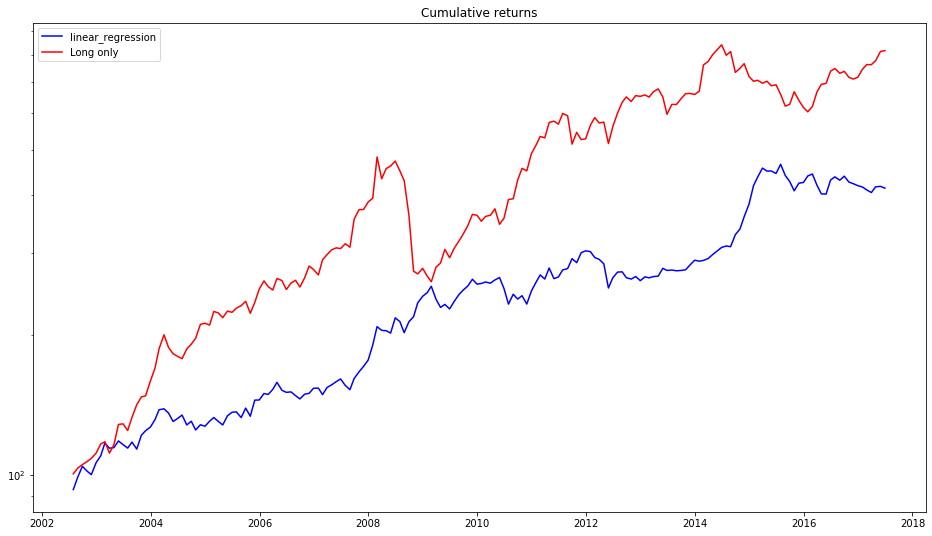

Passive Long only return: 718.01%, Annualized: 15.04%
TSMOM linear_regression return: 313.68%, Annualized: 9.93%


In [78]:
backtesting(close_df, gk_monthly, start_date= 36, years=15, method="linear_regression", plot=True)

## Decision Tree

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


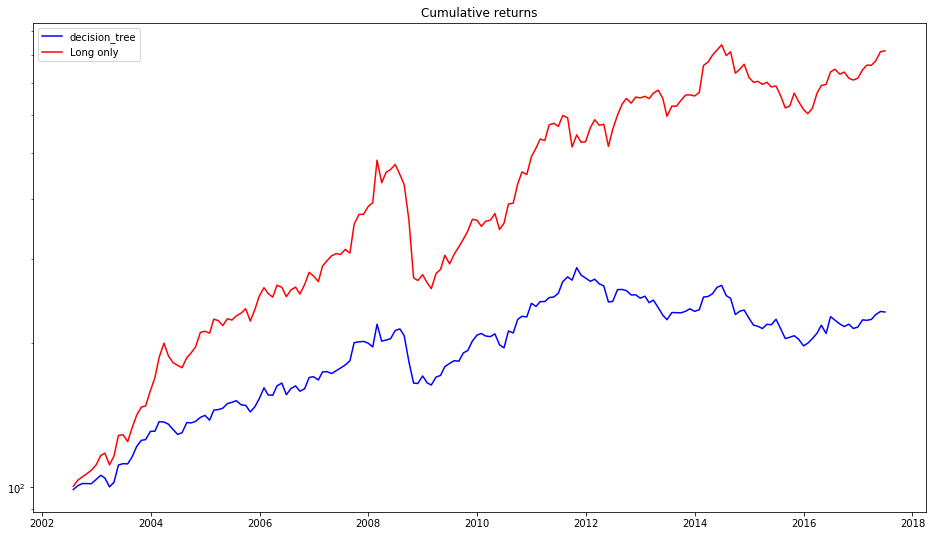

Passive Long only return: 718.01%, Annualized: 15.04%
TSMOM decision_tree return: 132.35%, Annualized: 5.78%


In [76]:
backtesting(close_df, gk_monthly, start_date= 36, years=15, method="decision_tree", plot=True)

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


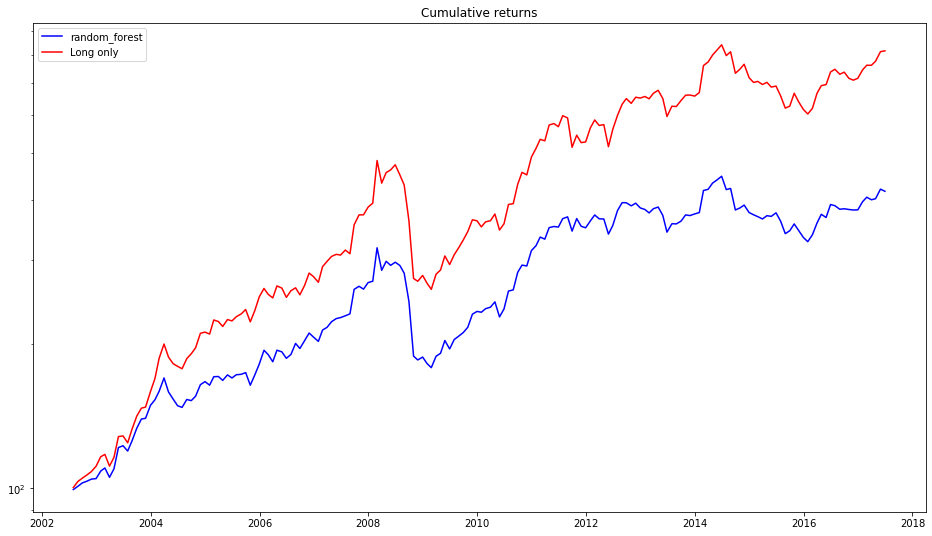

Passive Long only return: 718.01%, Annualized: 15.04%
TSMOM random_forest return: 316.64%, Annualized: 9.98%


In [77]:
backtesting(close_df, gk_monthly, start_date= 36, years=15, method="random_forest", plot=True)